In [6]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp
from ks_metric import ks_score


X, y = make_classification(
    n_samples=1000, class_sep=0.3, random_state=0
)  # 1000 samples with 20 features

# split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# simple Logistic Model
model = LogisticRegression(random_state=23)
model.fit(X_train, y_train)

# predictions
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

print("Accuracy train:", accuracy_score(y_train, y_train_pred > 0.5))
print("Accuracy test:", accuracy_score(y_test, y_test_pred > 0.5))
print("F1 train:", f1_score(y_train, y_train_pred > 0.5))
print("F1 test:", f1_score(y_test, y_test_pred > 0.5))
print("AUC train:", roc_auc_score(y_train, y_train_pred))
print("AUC test:", roc_auc_score(y_test, y_test_pred))
print("KS train:", ks_2samp(y_train, y_train_pred).statistic)
print("KS test:", ks_2samp(y_test, y_test_pred).statistic)

Accuracy train: 0.7328358208955223
Accuracy test: 0.7181818181818181
F1 train: 0.7089430894308942
F1 test: 0.7223880597014926
AUC train: 0.7871932515337423
AUC test: 0.7467986458639977
KS train: 0.5134328358208955
KS test: 0.5212121212121212


In [22]:
auc_train = []
auc_test = []
ks_train = []
ks_test = []
for i in range(50):
    X, y = make_classification(
        n_samples=1000, class_sep=i*0.02, random_state=0
    )  # 1000 samples with 20 features

    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )

    # simple Logistic Model
    model = LogisticRegression(random_state=23)
    model.fit(X_train, y_train)

    # predictions
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    auc_train.append(roc_auc_score(y_train, y_train_pred))
    auc_test.append(roc_auc_score(y_test, y_test_pred))
    ks_train.append(ks_score(y_train, y_train_pred))
    ks_test.append(ks_score(y_test, y_test_pred))

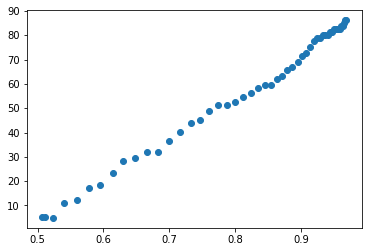

In [23]:
from matplotlib import pyplot as plt
# plt.scatter(auc_train, ks_train)
plt.scatter(auc_test, ks_test)

In [24]:
for x,y in zip(auc_test, ks_test):
    print(x,y)

0.5067338828377981 5.34
0.5108919634972034 5.34
0.523844568737121 4.859999999999999
0.5408080659405358 10.93
0.5595010303208714 12.389999999999999
0.5778996173093907 17.24
0.5950471003826906 18.459999999999997
0.6139240506329113 23.31
0.6302251987047395 28.17
0.6481454224315573 29.39
0.6666544009420077 31.81
0.682293199882249 31.81
0.699514277303503 36.67
0.7157786282013541 40.31
0.7323373564910214 43.96
0.7467986458639977 45.17
0.7606343832793642 48.82
0.7745069178687077 51.239999999999995
0.7874227259346483 51.239999999999995
0.8002281424786577 52.459999999999994
0.8121504268472183 54.64
0.8244038857815721 56.10000000000001
0.834891080365028 58.29
0.8451942890785987 59.74
0.8550191345304681 59.74
0.8629673241095084 61.92999999999999
0.871136296732411 63.13999999999999
0.8790108919634971 65.57
0.8868486900206064 66.79
0.8952384456873712 69.22
0.9017883426552841 71.64
0.9077862820135414 72.86
0.9142625846335002 75.29
0.9196717692081249 77.72
0.924676184869002 78.93
0.9290550485722695 7